In [82]:
import sympy as spp
from sympy.abc import t, omega # für Variablen
from sympy import simplify


import symengine as sp

from symengine import Symbol, sympify
from symengine import sin, cos

In [92]:


def arc_length( curve, variable ):
    v_vec = simplify(spp.diff(curve, variable))
    v_t = simplify(spp.sqrt(v_vec.dot(simplify(v_vec))))
    s = spp.integrate(v_t, t)

    return simplify(s)

In [95]:
from sympy.abc import a, b, v, r 

vec = spp.Matrix([r * cos(b) * cos(omega * t) + (-r*sin (a)*sin(omega * t) + v * t *cos(a)) * sin(b), r * sin(omega*t) * cos(a) + v*t*sin(a), -r * sin(b) * cos(omega * t) + (-r*sin (a)*sin(omega * t) + v * t *cos(a)) * cos(b)])

simple_vec = simplify(vec)

simple_vec



Matrix([
[ r*cos(b)*cos(omega*t) - (r*sin(a)*sin(omega*t) - t*v*cos(a))*sin(b)],
[                                  r*sin(omega*t)*cos(a) + t*v*sin(a)],
[-r*sin(b)*cos(omega*t) - (r*sin(a)*sin(omega*t) - t*v*cos(a))*cos(b)]])

In [96]:
arc_length(simple_vec, t)

t*sqrt(omega**2*r**2 + v**2)

Das entspricht der Bogenlänge aus Aufgabenteil a), es liegt also wieder eine Helixartige Bewegung vor. Dabei sind omega sowie v und r ebenfalls für die Kreisgeschwindigkeit, Steigegeschwindigkeit, sowie den Radius verantwortlich. Die Parameter a und b wirken nun dabei eine Scherwirkung in x bzw. y Richtung. Diese Transformationen des Helix ändern die Bogenlänge jedoch wie berechnet nicht.

In [97]:
# was hier passiert, ist nicht so wichtig, sondern soll nur eine drehbare 3D-Ansicht ermöglichen
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [133]:
## es ist oft eine gute idee, teile eines programms, die man immer wieder benutzt, in funktionen auszulagern


from typing import Callable

def curve3D( t : list[float], x_t : Callable[[float], float], y_t : Callable[[float], float], z_t : Callable[[float], float] ):
    return [[x_t(e) for e in t], [y_t(e) for e in t], [z_t(e) for e in t]]

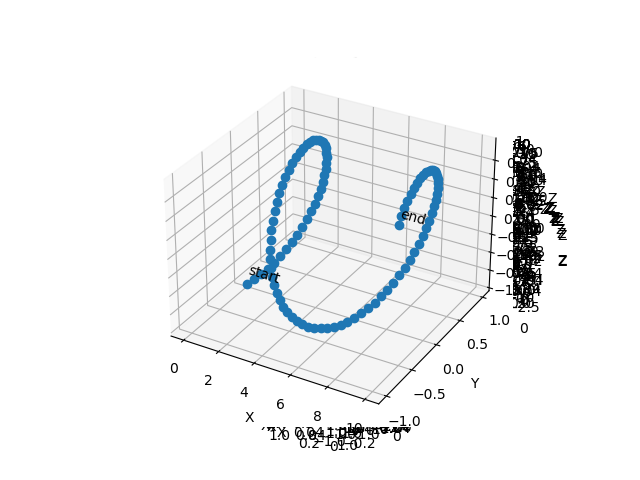

In [152]:
parameter_range = np.linspace(0, 10, 100)
from math import sin, cos, pi

a, b, omega, v, r = 0, pi / 2, 1, 1, 1


curve = [
    lambda t_ : r * cos(b) * cos(omega * t_) + (-r * sin (a) * sin(omega * t_) + v * t_ * cos(a)) * sin(b),
    lambda t_ : r * sin(omega * t_) * cos(a) + v * t_ * sin(a), 
    lambda t_ : -r * sin(b) * cos(omega * t_) + (-r * sin (a) * sin(omega * t_) + v * t_ * cos(a)) * cos(b)
]


xdata, ydata, zdata = curve3D(parameter_range, curve[0], curve[1], curve[2])
fig = plt.figure('Kurve 3D')
ax = plt.axes(projection='3d')
ax.plot( xdata, ydata, zdata, 'o' )
ax.text( xdata[0], ydata[0], zdata[0], 'start', 'x' )
ax.text( xdata[-1], ydata[-1], zdata[-1], 'end', 'x' )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Für $a = 0$ und $b = pi/2$, sowie $omega = r = v = 1$ ergibt sich zum Beispiel ein zur Seite drehender Helix.